In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

## Getting Data

Contains the following 6 fields:

* target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
* ids: The id of the tweet ( 2087)
* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* flag: The query (lyx). If there is no query, then this value is NO_QUERY.
* user: the user that tweeted (robotickilldozr)
* text: the text of the tweet (Lyx is cool)

In [2]:
columns  = ["sentiment", "ids", "date", "flag", "user", "text"]
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", names = columns)
df.head()

sentiment         ids                          date      flag  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [3]:
df.shape

(1600000, 6)

In [4]:
len(df['user'].unique())

659775

<Axes: title={'center': 'Ratio of sentiment label'}, ylabel='Counts'>

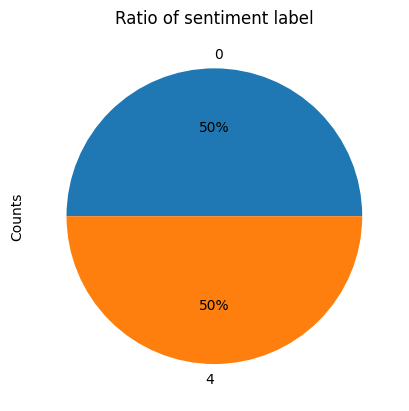

In [5]:
df.groupby(['sentiment']).size().plot(kind='pie',ylabel='Counts', autopct='%1.0f%%', title='Ratio of sentiment label')

There are two type of sentiment - 0 for negative and 4 for positive in this dataset.

### Weighted sampling the data

In [6]:
dataText = df.groupby('sentiment')[['sentiment', 'text']].sample(n=70000, random_state=1)
dataText.reset_index(inplace=True)

In [7]:
dataText

index  sentiment                                               text
0        670935          0  @TheRealScarab PA system bugs are a bummer, so...
1        649589          0  oh daaamnnn! the firemen ball's on the 14th an...
2          2028          0        I don't want to be cold in April, but I am 
3        669856          0  @JaredOngie haha its too cold down here  bt ot...
4        458897          0                        Upset I can't find my CHI! 
...         ...        ...                                                ...
139995   860453          4  @lynnnein Lmao I think I'll always have growin...
139996  1070764          4  @marinavorobyev no doubt, we have to support e...
139997   978520          4  now on, gonna have a word of the day  todays w...
139998  1502159          4  @LolaHedoOnline awful and sweaty are two of my...
139999  1326581          4             @GUnitKimmie that's what it is!!!!!!! 

[140000 rows x 3 columns]

<Axes: xlabel='sentiment'>

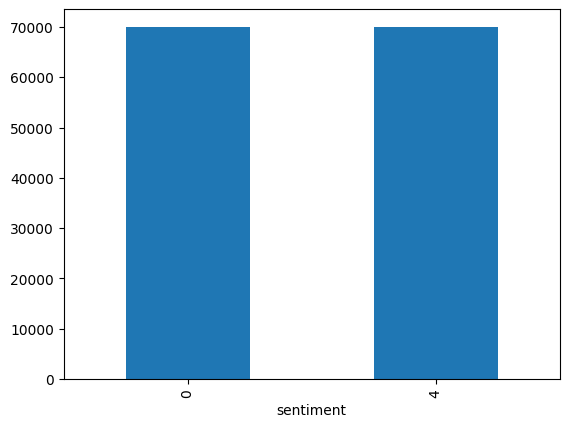

In [8]:
dataText.groupby(['sentiment']).size().plot(kind='bar')

## Preprocessing text

#### Checking for null values

In [9]:
dataText.isnull().any()

index        False
sentiment    False
text         False
dtype: bool

#### WordCloud

In [10]:
# !pip install wordcloud

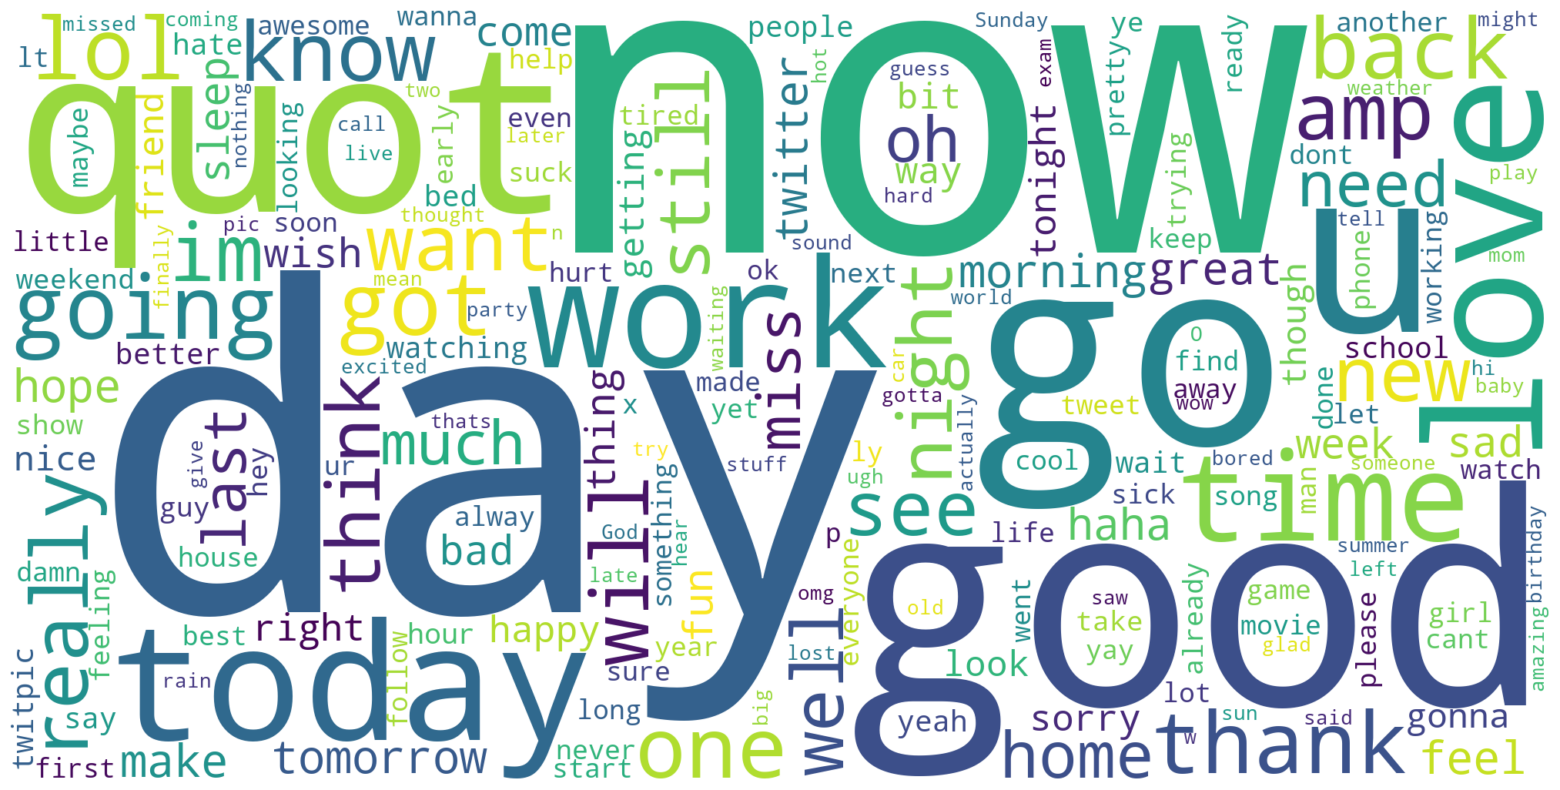

In [11]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
#Creating the text variable
textBeforePre = " ".join(cat for cat in dataText.text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(textBeforePre)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
dataText['target'] = dataText['sentiment'].apply(lambda x : x if x==0 else 1)

<Axes: xlabel='target'>

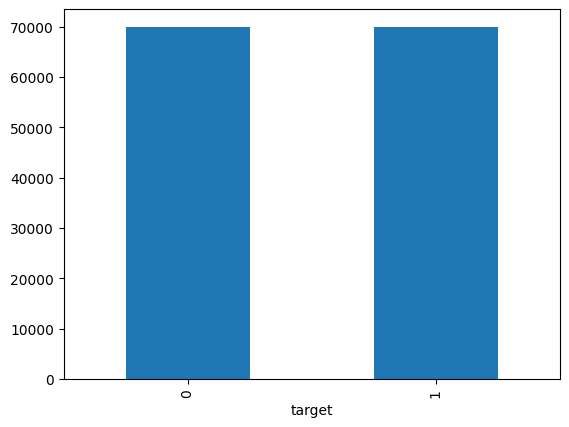

In [15]:
dataText.groupby(['target']).size().plot(kind='bar')

In [16]:
dataText.shape

(140000, 4)

### Preprocessing Methods

We have taken the following data preprocessing steps into consideration:

* **Lower Casing**: Each text is converted to lowercase.
* **Removing URLs**: Links starting with 'http' or 'https' or 'www' are replaced by space.
* **Removing Usernames**: Replace @Usernames with word space.
* **Replacing Emojies** : replace all emojis from the emoji shortcodes [eg: üëç to 'thumbs up']
* **Replacing the chat words and numbers** : replace all chat abrevations from the normal words [eg: lol to 'laugh out loud' and 1 to one]
* **Replacing Contractions**: Replacing contractions with their meanings. [eg: "can't" to 'can not']
* **Removing Puntuations**: Replacing characters other than Digits, Alphabets and pre-defined Symbols with a space.
* **Lemmatization** and replacing **Consecutive letters**: lemmatizing the words and replacing 3 or more consecutive letters are replaced by 1 letters. [eg: 'damnnnnnn' to 'damn']
* **Replacing mistake of spellings** : correcting the spelling mistakes. [eg. caar to car]
* **Removing stopwords** : words which are not meaningful to the sentiment of the sentence.

In [ ]:
dataText['processedText'] = dataText['text'].apply(preprocessingText)

In [17]:
dataText

index  sentiment                                               text  \
0        670935          0  @TheRealScarab PA system bugs are a bummer, so...   
1        649589          0  oh daaamnnn! the firemen ball's on the 14th an...   
2          2028          0        I don't want to be cold in April, but I am    
3        669856          0  @JaredOngie haha its too cold down here  bt ot...   
4        458897          0                        Upset I can't find my CHI!    
...         ...        ...                                                ...   
139995   860453          4  @lynnnein Lmao I think I'll always have growin...   
139996  1070764          4  @marinavorobyev no doubt, we have to support e...   
139997   978520          4  now on, gonna have a word of the day  todays w...   
139998  1502159          4  @LolaHedoOnline awful and sweaty are two of my...   
139999  1326581          4             @GUnitKimmie that's what it is!!!!!!!    

        target  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
139995       1  
139996       1  
139997       1  
139998       1  
139999       1  

[140000 rows x 4 columns]

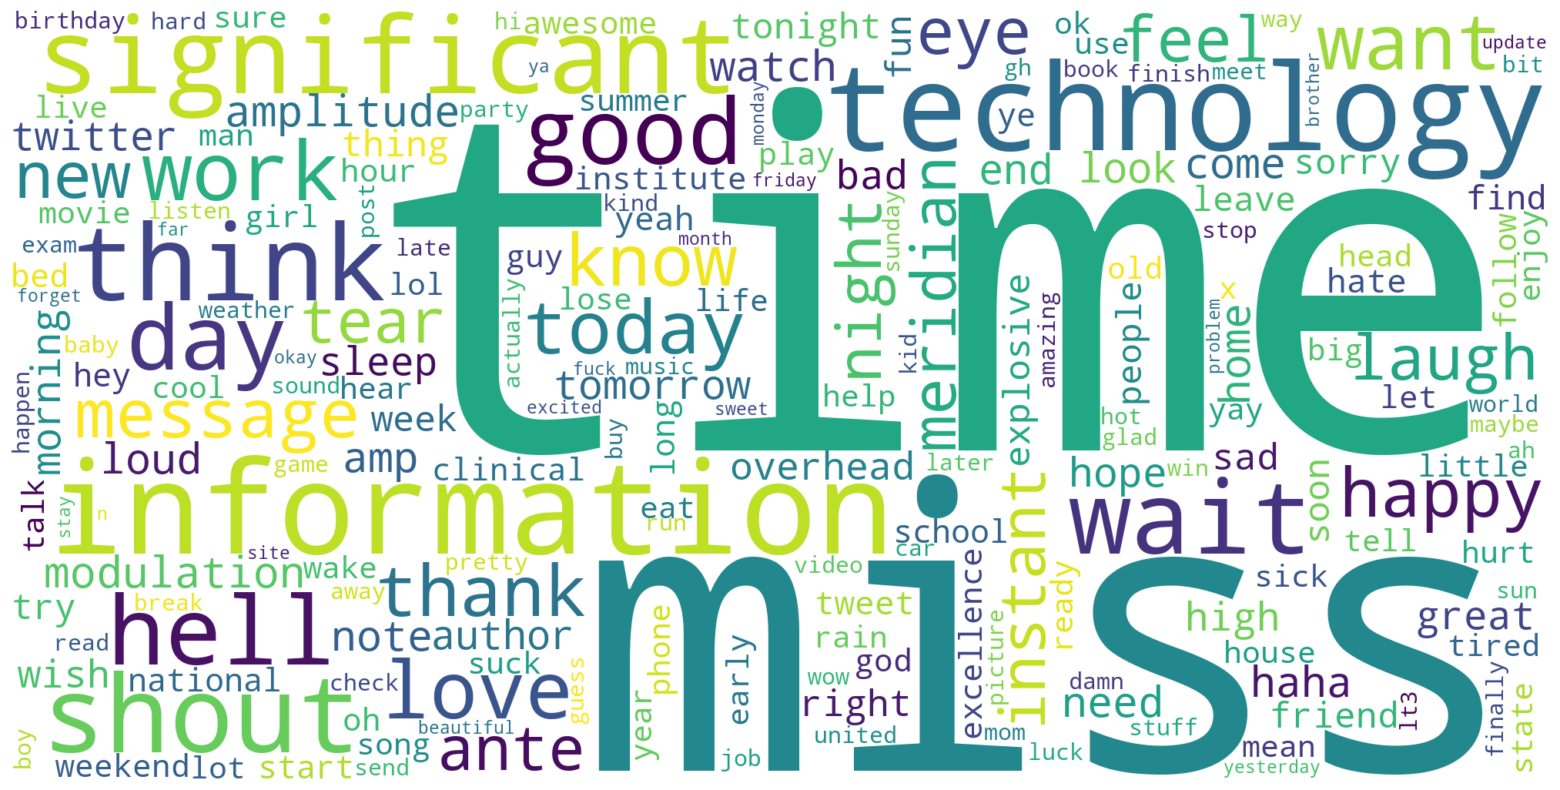

In [32]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
#Creating the text variable
textAfterPre = " ".join(cat for cat in dataText['processedText'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', width=2000, height=1000).generate(textAfterPre)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
dataText.to_pickle('preprocessedtext.pkl')

In [31]:
dataPreprocessed = pd.read_pickle("preprocessedtext.pkl")
dataPreprocessed

index  sentiment                                               text  \
0        670935          0  @TheRealScarab PA system bugs are a bummer, so...   
1        649589          0  oh daaamnnn! the firemen ball's on the 14th an...   
2          2028          0        I don't want to be cold in April, but I am    
3        669856          0  @JaredOngie haha its too cold down here  bt ot...   
4        458897          0                        Upset I can't find my CHI!    
...         ...        ...                                                ...   
139995   860453          4  @lynnnein Lmao I think I'll always have growin...   
139996  1070764          4  @marinavorobyev no doubt, we have to support e...   
139997   978520          4  now on, gonna have a word of the day  todays w...   
139998  1502159          4  @LolaHedoOnline awful and sweaty are two of my...   
139999  1326581          4             @GUnitKimmie that's what it is!!!!!!!    

        target                                      processedText  
0            0        personal assistant system bugs summer sorry  
1            0  overhead damn firemen ball 14th I cannes signi...  
2            0  I want time cold april I ante meridian amplitu...  
3            0  haha I think think cold instant message fine s...  
4            0                              upset I find miss chi  
...        ...                                                ...  
139995       1                laugh ass I think I grow pains grow  
139996       1                                 doubt time support  
139997       1                word day todays word hmm apocalypse  
139998       1         awful sweat miss favorite things lime face  
139999       1                             information technology  

[140000 rows x 5 columns]

# Basic customized model approach

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


df_train, df_test, y_train_basic, y_test_basic = train_test_split(dataPreprocessed['processedText'], dataPreprocessed.target, test_size=0.2, random_state=0)

tfidf_vectorizer_train = TfidfVectorizer()
tfidf_vectorizer_train.fit(dataPreprocessed['processedText'])
X_train_basic = tfidf_vectorizer_train.transform(df_train)
X_test_basic = tfidf_vectorizer_train.transform(df_test)

print(X_train_basic.shape)

(112000, 48191)


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Fucntion to calculate the score and confusion matrix to print
def metrixAndScoring(test, pred, fold=0): 
    if fold:
        return [fold, precision_score(test, pred), recall_score(test, pred), f1_score(test, pred), accuracy_score(test, pred), roc_auc_score(test, pred)]
    else:
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        fpr, tpr, _ = roc_curve(test, pred)
        roc_auc = auc(fpr, tpr)

        # Compute micro-average ROC curve and ROC area
        fpr, tpr, _ = roc_curve(test.ravel(), pred.ravel())
        roc_auc = auc(fpr, tpr)
        f, axs = plt.subplots(1,3,figsize=(10,4),sharey=True)
        f.tight_layout()
        plt.subplot(1, 2, 1)
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic curve')
        plt.legend(loc="lower right")
        plt.subplot(1, 2, 2)
        class_names = [0,1]
        # Confusion Matrix Display
        cf_matrix = confusion_matrix(test, pred)
        group_names = ["True Neg","False Pos","False Neg","True Pos"]
        group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        s = sns.heatmap(cf_matrix, annot=labels,fmt='')
        s.set_title("Confusion metric")
        plt.show()
        s.set(ylabel='True labels', xlabel='Predicted labels')
        return [precision_score(test, pred), recall_score(test, pred), f1_score(test, pred), accuracy_score(test, pred), roc_auc_score(test, pred)] + group_percentages
        

from sklearn.inspection import permutation_importance

# function to calculate feature importance
def variableImportance(model, X, y, reg):
    plt.figure(figsize=(20,5))
    # plot feature importance
    if reg:
        feat_importances = pd.Series(model.coef_[0], index=X.columns)
        f, axs = plt.subplots(1,2,figsize=(20,5),sharey=True)
        f.tight_layout()
        plt.subplot(1, 2, 1)
        feat_importances.nlargest(50).plot(kind='bar')
        plt.title("Variable predicting class 1 (Target = 1)")
        plt.xlabel("Number of variables")
        plt.ylabel("Score")
        plt.xticks(fontsize=10)
        plt.subplot(1, 2, 2)
        feat_importances.nsmallest(50).plot(kind='bar')
        plt.title("Variable predicting class 0 (Target = 0)")
        plt.xlabel("Number of variables")
        plt.ylabel("Score")
        plt.xticks(fontsize=10)
        plt.show()
    else:
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        # plt.bar([x for x in range(len(importance))], importance)
        feat_importances.nlargest(100).plot(kind='bar')
        plt.title("Variable importance with positive effect (Target = 1)")
        plt.xlabel("Number of variables")
        plt.ylabel("Score")
        plt.xticks(fontsize=10)

    
AllScores = []
def fittingModel(name, model, x_train, x_test ,y_train, y_test):
    # fitting the data to the given model
    model.fit(x_train, y_train)
    # displaying the interpretated values
    returnValues = [name]+metrixAndScoring(y_test, model.predict(x_test))
    AllScores.append(returnValues)
    display(pd.DataFrame([[returnValues[1], returnValues[2], returnValues[3], returnValues[4], returnValues[5]]], columns=['Precision', 'Recall', 'F1', 'Accuracy', 'ROC AUC Score']).round(2))
    return model

### LogisticRegression

c:\Users\Kevin Zhu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_54124\166310651.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_54124\166310651.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor

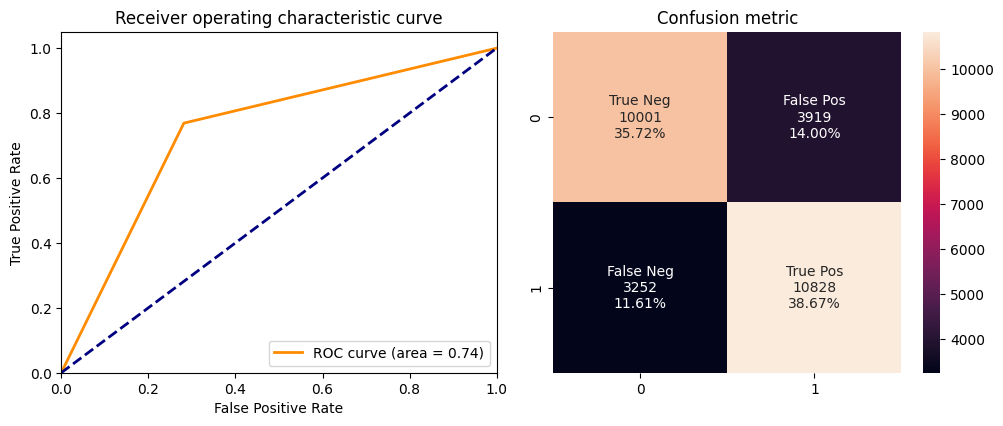

Precision  Recall    F1  Accuracy  ROC AUC Score
0       0.73    0.77  0.75      0.74           0.74

In [33]:
from sklearn.linear_model import LogisticRegression


log_model = fittingModel("LogisticRegression" , LogisticRegression(), X_train_basic, X_test_basic, y_train_basic, y_test_basic )

##### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier


fittingModel("RandomForestClassifier",RandomForestClassifier(), X_train_basic, X_test_basic, y_train_basic, y_test_basic )

##### Boosting with XGBoost

C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_54124\166310651.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\Kevin Zhu\AppData\Local\Temp\ipykernel_54124\166310651.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


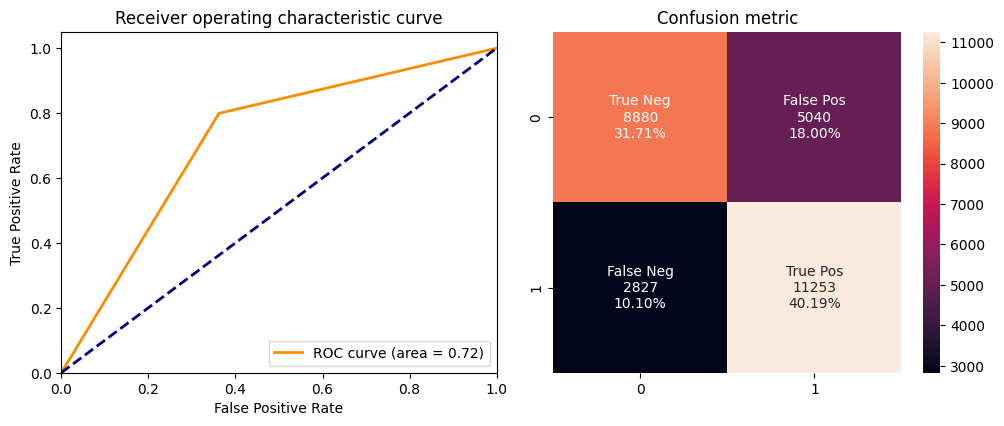

Precision  Recall    F1  Accuracy  ROC AUC Score
0       0.69     0.8  0.74      0.72           0.72

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
from xgboost import XGBClassifier


fittingModel("XGBClassifier", XGBClassifier(), X_train_basic, X_test_basic, y_train_basic, y_test_basic)


Text(0.5, 1.0, 'Model Comparison')

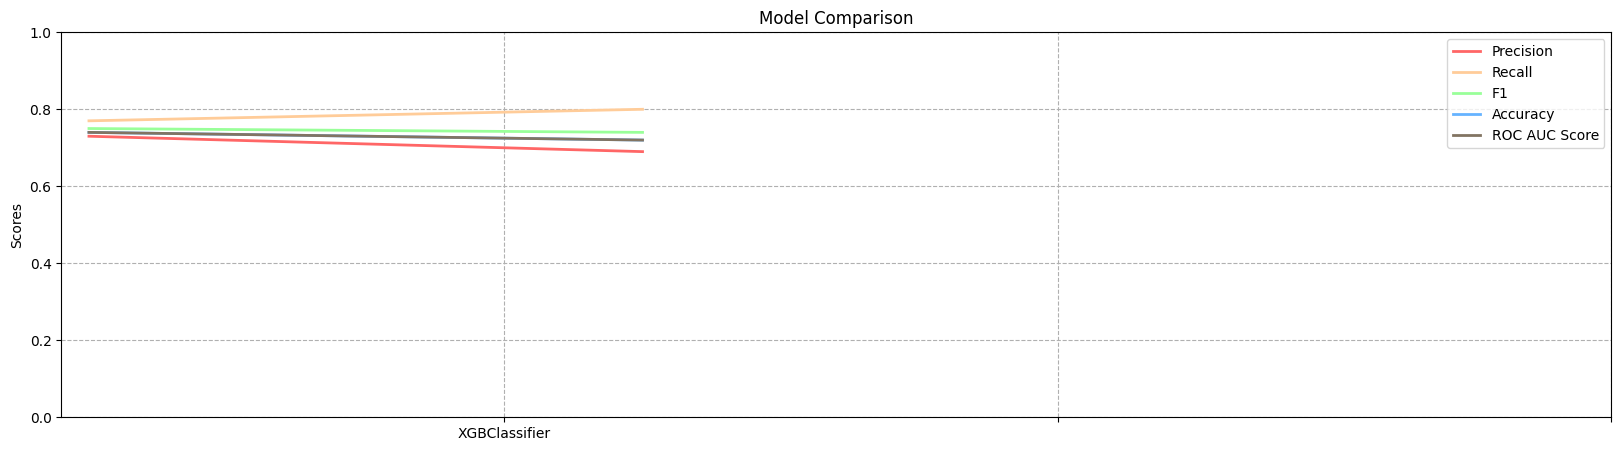

In [35]:
compare_data = pd.DataFrame(AllScores, columns=["Model", 'Precision', 'Recall', 'F1', 'Accuracy', 'ROC AUC Score', "True Negative", "False Positive", "False Negative", "True Positive"]).round(2)

fig = plt.subplots(figsize=(20,5), sharex=True)
x = np.arange(len(compare_data['Model']))
plt.grid(True, linestyle='--')
plt.plot(compare_data['Model'], compare_data['Precision'], color='#ff6666', label='Precision', linewidth=2)
plt.plot(compare_data['Model'] , compare_data['Recall'], color='#ffcc99', label='Recall', linewidth=2)
plt.plot(compare_data['Model'], compare_data['F1'], color='#99ff99', label='F1', linewidth=2)
plt.plot(compare_data['Model'], compare_data['Accuracy'], color='#66b3ff', label='Accuracy', linewidth=2)
plt.plot(compare_data['Model'], compare_data['ROC AUC Score'], color='#827462', label='ROC AUC Score', linewidth=2)
plt.legend()
plt.ylabel('Scores')
plt.ylim(0,1)
plt.xticks(x + 0.5 + 0.5/2)
plt.title('Model Comparison')

# Advance customized model

Spliting the dataset

In [22]:
from sklearn.model_selection import train_test_split
df_train, df_test_val, y_train, y_test_val = train_test_split(dataPreprocessed['processedText'], dataPreprocessed.target, test_size = 0.3, random_state = 0)
df_test, df_val, y_test, y_val = train_test_split(df_test_val, y_test_val, test_size = 0.5, random_state = 0)

Creating token from text

In [23]:
textToken = [_text.split() for _text in dataPreprocessed['processedText']]

### Creating embedding model
Word2vec 

In [24]:
from gensim.models import Word2Vec
import gensim.downloader as api
Embedding_dimensions = 300

#Loading a pretrained model on tweets

# model_pre_w2v = api.load("glove-twitter-100")


w2v_model = Word2Vec(vector_size=Embedding_dimensions, # Dimensionality of word embeddings
                      window=6,                         # Context window for words during training
                      min_count=3,                      # Minimun threshold of word frequency
                      workers=8,
                      epochs=20)                        # Number of epochs training over corpus
gen_vocab_w2v = w2v_model.build_vocab(textToken)
# w2v_model.build_vocab([list(model_pre_w2v.vocab.keys())], update=True)
# w2v_model.intersect_word2vec_format("glove.6B.300d.txt", binary=False, lockf=1.0)
# w2v_model.train(textToken, total_examples=gen_vocab_w2v, epochs=w2v_model.iter)

Fasttext

In [25]:
from gensim.models import FastText


fasttext_model = FastText(vector_size=Embedding_dimensions, # Dimensionality of word embeddings
                      window=6,                             # Context window for words during training
                      min_count=3,                          # Minimun threshold of word frequency
                      workers=8,
                      epochs=20)                            # Number of epochs training over corpus
fasttext_model.build_vocab(textToken)

### Tokenizing and Padding 

**Tokenization** is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either word, character, and subword (n-gram characters).

**Padding** is the process by which we can add padding tokens at the start or end of a sentence to increase it's length upto the required size. If required, we can also drop some words to reduce to the specified length.

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# creating fix test length for padding
input_length = 150

# tokenizing the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataPreprocessed['processedText'])

# creating vocabulary
vocab_size = len(tokenizer.word_index) + 1
print("Total vocabulary", vocab_size)

# Tokenizing and padding the train and test dataset
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train), maxlen=input_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test), maxlen=input_length)

Total vocabulary 46278


In [27]:
embedding_vector = {}
f = open('glove.6B/glove.6B.300d.txt')
for line in f:
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

**Embedding Layer** - Generates Embedding Vector for each input sequence.

In [28]:
from keras.layers import Embedding

def createEmbeddingMatrix(model, modelName):
  embedding_matrix = np.zeros((vocab_size, Embedding_dimensions))
  for word, i in tokenizer.word_index.items():
    if modelName == 'Glove':
      embedding_value = embedding_vector.get(word)
      if embedding_value is not None:
          embedding_matrix[i] = embedding_value
    else:
      if word in model.wv:
        embedding_matrix[i] = model.wv[word]
  print("Embedded matrix shape for ", modelName ,":", embedding_matrix.shape)
  return embedding_matrix

In [29]:
embedding_layer_word2vec = Embedding(vocab_size, Embedding_dimensions, weights=[createEmbeddingMatrix(w2v_model, "Word2vec")], input_length=input_length, trainable=False)
embedding_layer_fasttext = Embedding(vocab_size, Embedding_dimensions, weights=[createEmbeddingMatrix(fasttext_model, "FastText")], input_length=input_length, trainable=False)
embedding_layer_glove = Embedding(vocab_size, Embedding_dimensions, weights=[createEmbeddingMatrix(embedding_vector, 'Glove')], input_length=input_length, trainable=False)

Embedded matrix shape for  Word2vec : (46278, 300)

Embedded matrix shape for  FastText : (46278, 300)

Embedded matrix shape for  Glove : (46278, 300)


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.config.get_visible_devices())

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


# Model

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction.

## Recurrent Neural Networks (RNN)

In [31]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dense  , Conv1D, GlobalMaxPool1D, MaxPooling1D, Dropout, BatchNormalization, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [32]:
callbacks = [ReduceLROnPlateau(factor=0.1,min_lr = 0.001, monitor = 'val_loss',verbose = 1),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [41]:
evaluationScore = []
# Defining LSTM model
def simpleLSTM(embedded_layer):
	lstm_model = Sequential(name="LSTM_Model")
	lstm_model.add(embedded_layer)
	lstm_model.add(LSTM(128,activation='relu', return_sequences=True))
	lstm_model.add(Dense(1, activation='sigmoid'))

	# Printing Model Summary
	print(lstm_model.summary())

	# Compiling the model
	lstm_model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

	# Training the model
	history = lstm_model.fit(x_train, y_train,
							batch_size=512,
							epochs=10,
							verbose=1,
							validation_split=0.1,
							callbacks=callbacks)
	print("LSTM model Score---> ", lstm_model.evaluate(x_test, y_test, verbose=0))
	return (lstm_model, history)


In [42]:
def lossAndAccuracy(hist, title):
    acc,  val_acc  = hist.history['accuracy'], hist.history['val_accuracy']
    loss, val_loss = hist.history['loss'], hist.history['val_loss']
    epochs = range(len(acc))

    plt.suptitle(title)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

In [43]:
# from sklearn.metrics import confusion_matrix, classification_report

# def ConfusionMatrix(model, x_test, y_test, title):
#     pred = model.predict(x_test)
#     y_pred = pd.Series([val[0][0] for val in np.where(pred>=0.5, 1, 0)])
#     # Compute and plot the Confusion matrix
#     cf_matrix = confusion_matrix(y_test, y_pred)

#     categories  = ['Negative','Positive']
#     group_names = ['True Neg','False Pos', 'False Neg','True Pos']
#     group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

#     labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)
#     print(classification_report(y_test, y_pred))
#     sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
#                 xticklabels = categories, yticklabels = categories)

#     plt.xlabel("Predicted values", fontdict = {'size':14})
#     plt.ylabel("Actual values"   , fontdict = {'size':14})
#     plt.title (title, fontdict = {'size':16})

#### Simple LSTM with word2vec embeddings

In [44]:
simpleLSTMWord2vec = simpleLSTM(embedding_layer_word2vec)


Model: "LSTM_Model"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding (Embedding)       (None, 150, 300)          13883400  

                                                                 

 lstm (LSTM)                 (None, 150, 128)          219648    

                                                                 

 dense (Dense)               (None, 150, 1)            129       

                                                                 


Total params: 14,103,177

Trainable params: 219,777

Non-trainable params: 13,883,400

_________________________________________________________________

None

Epoch 1/10

206/206 [==============================] - 126s 600ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4985 - lr: 0.0010

Epoch 2/10

206/206 [==============================] - 128s 622ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.

<Figure size 640x480 with 0 Axes>

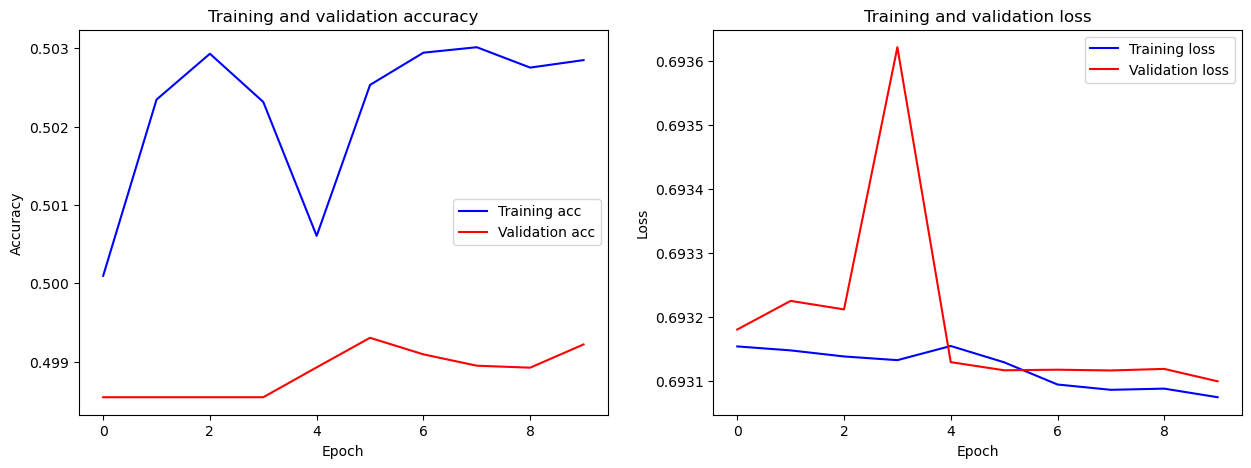

In [45]:
lossAndAccuracy(simpleLSTMWord2vec[1], 'Simple LSTM with Word2vec embedding model')

#### Simple LSTM with Fasttext embeddings

In [46]:
simpleLSTMFastText = simpleLSTM(embedding_layer_fasttext)


Model: "LSTM_Model"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding_1 (Embedding)     (None, 150, 300)          13883400  

                                                                 

 lstm_1 (LSTM)               (None, 150, 128)          219648    

                                                                 

 dense_1 (Dense)             (None, 150, 1)            129       

                                                                 


Total params: 14,103,177

Trainable params: 219,777

Non-trainable params: 13,883,400

_________________________________________________________________

None

Epoch 1/10

206/206 [==============================] - 128s 613ms/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4985 - lr: 0.0010

Epoch 2/10

206/206 [==============================] - 126s 612ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.

<Figure size 640x480 with 0 Axes>

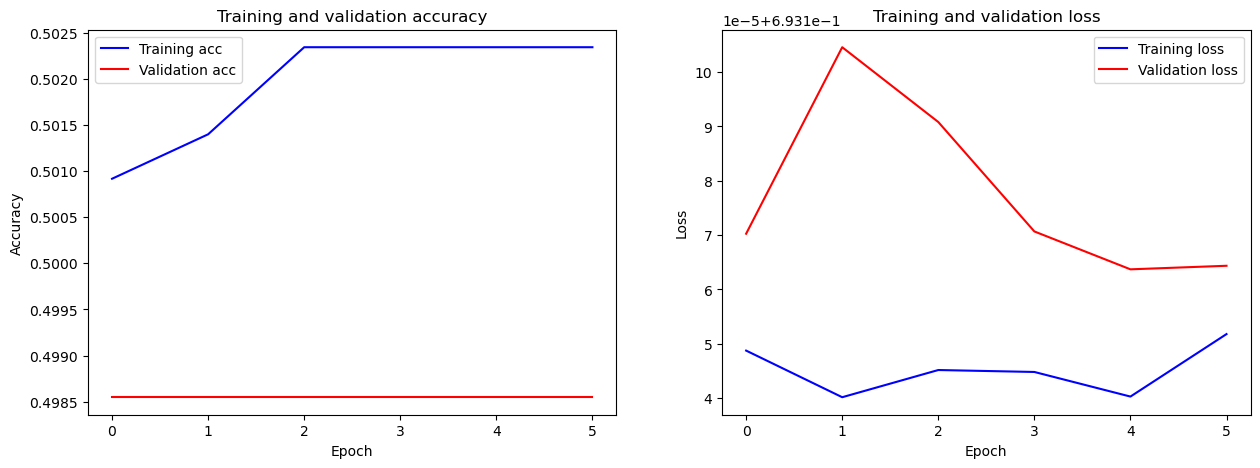

In [47]:
lossAndAccuracy(simpleLSTMFastText[1], 'Simple LSTM with FastText embedding model')

#### Simple LSTM with GloVe embeddings

In [48]:
simpleLSTMGlove = simpleLSTM(embedding_layer_glove)


Model: "LSTM_Model"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding_2 (Embedding)     (None, 150, 300)          13883400  

                                                                 

 lstm_2 (LSTM)               (None, 150, 128)          219648    

                                                                 

 dense_2 (Dense)             (None, 150, 1)            129       

                                                                 


Total params: 14,103,177

Trainable params: 219,777

Non-trainable params: 13,883,400

_________________________________________________________________

None

Epoch 1/10

206/206 [==============================] - 130s 623ms/step - loss: 0.6901 - accuracy: 0.5075 - val_loss: 0.6893 - val_accuracy: 0.5056 - lr: 0.0010

Epoch 2/10

206/206 [==============================] - 127s 618ms/step - loss: 0.6891 - accuracy: 0.5091 - val_loss: 0.

<Figure size 640x480 with 0 Axes>

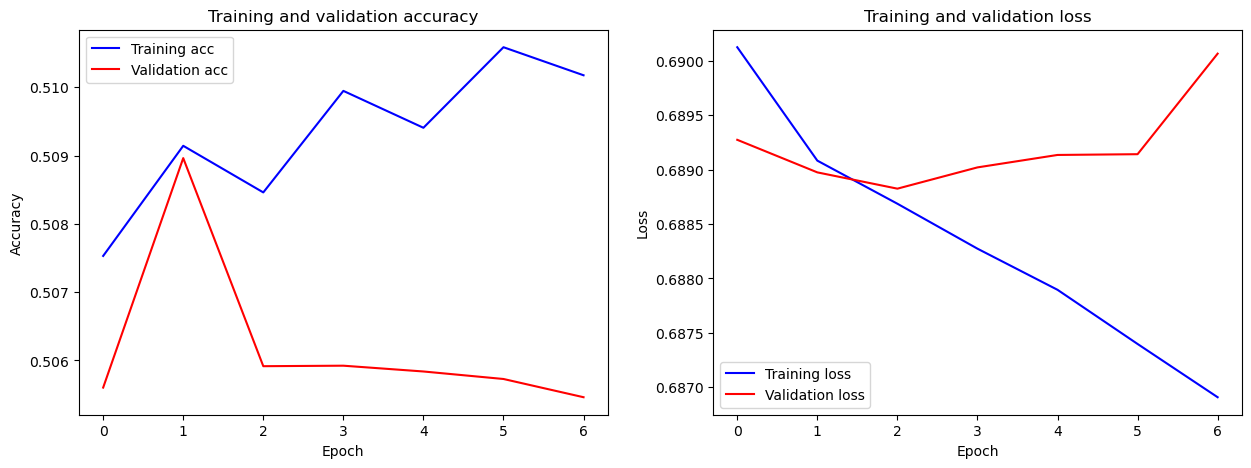

In [49]:
lossAndAccuracy(simpleLSTMGlove[1], 'Simple LSTM with Glove embedding model')

### Bidirectional LSTM 

In [50]:
# Defining Bidirectional LSTM model
def bilstmModel(embedding_layer):
  bi_lstm_model = Sequential(name="Bidirectional_LSTM")
  bi_lstm_model.add(embedding_layer)
  bi_lstm_model.add(Bidirectional(LSTM(128,activation='relu',return_sequences=True)))
  bi_lstm_model.add(Dense(1, activation='sigmoid'))

  # Printing model summary
  print(bi_lstm_model.summary())

  # Compiling model summary
  bi_lstm_model.compile(
  loss="binary_crossentropy",
  optimizer='adam',
  metrics=['accuracy']
  )

  # Training the model
  history = bi_lstm_model.fit(x_train, y_train,
                              batch_size=512,
                              epochs=10,
                              verbose=1,
                              validation_split=0.1,
                              callbacks=callbacks)
  print("Bi-directional LSTM model Score---> ", bi_lstm_model.evaluate(x_test, y_test, verbose=0))
  return (bi_lstm_model, history)

#### Bidirectional LSTM with word2vec embeddings

In [51]:
BiLSTMWord2vec = bilstmModel(embedding_layer_word2vec)




Model: "Bidirectional_LSTM"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding (Embedding)       (None, 150, 300)          13883400  

                                                                 

 bidirectional (Bidirectiona  (None, 150, 256)         439296    

 l)                                                              

                                                                 

 dense_3 (Dense)             (None, 150, 1)            257       

                                                                 


Total params: 14,322,953

Trainable params: 439,553

Non-trainable params: 13,883,400

_________________________________________________________________

None

Epoch 1/10

206/206 [==============================] - 224s 1s/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.4987 - lr: 0.0010

Epoch 2/10

206/206 [========================

<Figure size 640x480 with 0 Axes>

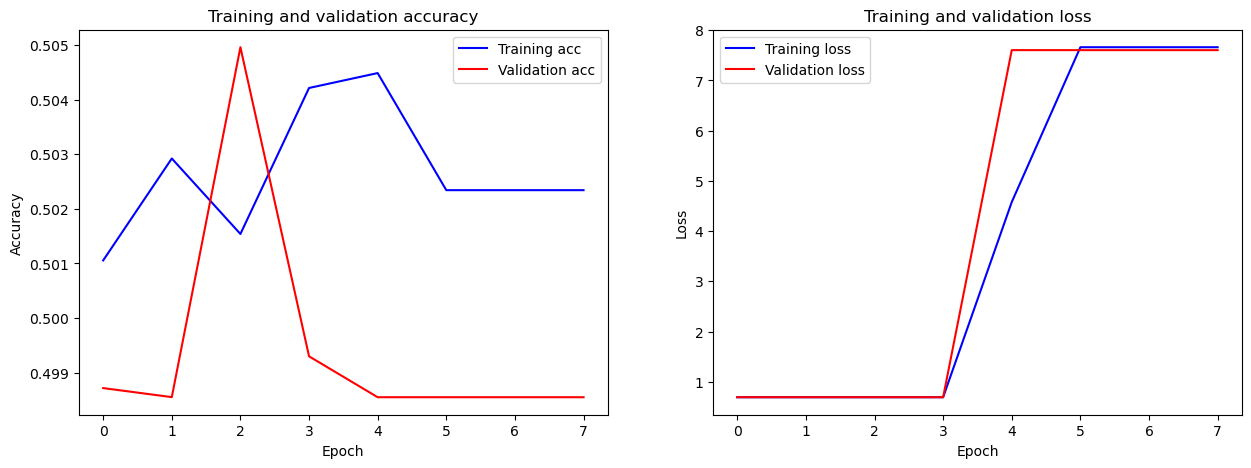

In [52]:
lossAndAccuracy(BiLSTMWord2vec[1], 'Bidirectional LSTM with Word2vec embedding model')

#### Bidirectional LSTM with Fasttext embeddings

In [53]:
biLSTMFastText = bilstmModel(embedding_layer_fasttext)




Model: "Bidirectional_LSTM"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding_1 (Embedding)     (None, 150, 300)          13883400  

                                                                 

 bidirectional_1 (Bidirectio  (None, 150, 256)         439296    

 nal)                                                            

                                                                 

 dense_4 (Dense)             (None, 150, 1)            257       

                                                                 


Total params: 14,322,953

Trainable params: 439,553

Non-trainable params: 13,883,400

_________________________________________________________________

None

Epoch 1/10

206/206 [==============================] - 221s 1s/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4985 - lr: 0.0010

Epoch 2/10

206/206 [========================

<Figure size 640x480 with 0 Axes>

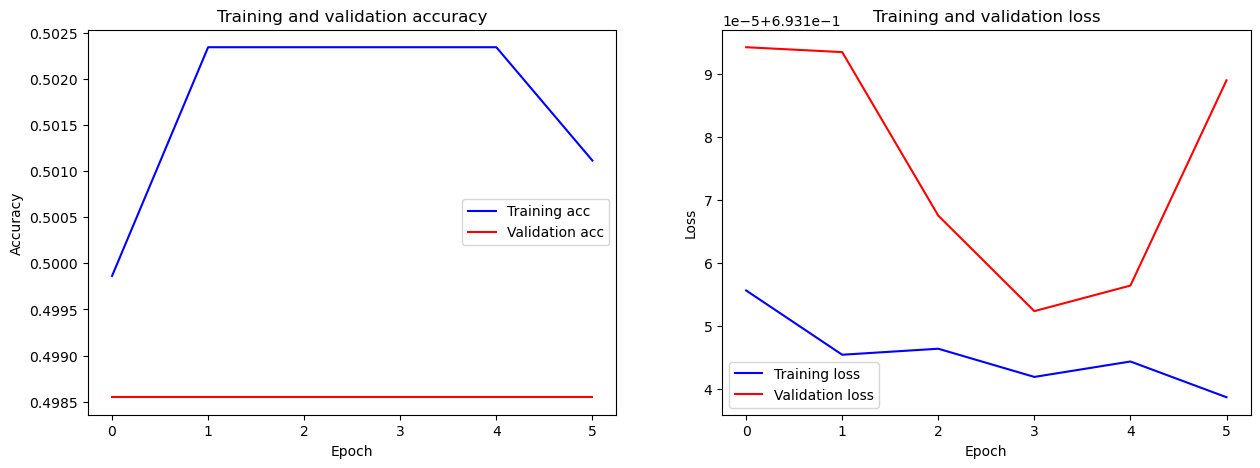

In [54]:
lossAndAccuracy(biLSTMFastText[1], 'Bidirectional LSTM with Fasttext embedding model')

#### Bidirectional LSTM with Glove embeddings

In [55]:
biLSTMGlove = bilstmModel(embedding_layer_glove)




Model: "Bidirectional_LSTM"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding_2 (Embedding)     (None, 150, 300)          13883400  

                                                                 

 bidirectional_2 (Bidirectio  (None, 150, 256)         439296    

 nal)                                                            

                                                                 

 dense_5 (Dense)             (None, 150, 1)            257       

                                                                 


Total params: 14,322,953

Trainable params: 439,553

Non-trainable params: 13,883,400

_________________________________________________________________

None

Epoch 1/10

206/206 [==============================] - 238s 1s/step - loss: 0.6530 - accuracy: 0.6266 - val_loss: 0.6594 - val_accuracy: 0.6396 - lr: 0.0010

Epoch 2/10

206/206 [========================

<Figure size 640x480 with 0 Axes>

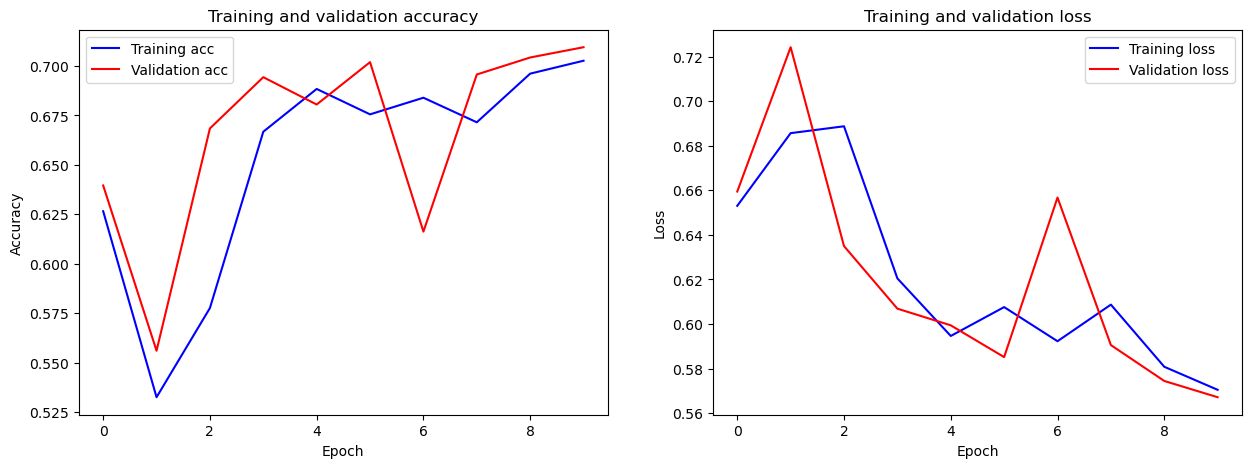

In [56]:
lossAndAccuracy(biLSTMGlove[1], 'Bidirectional LSTM with Glove embedding model')

## Results 

Score suggests that bidirectional LSTM with glove embeddings is performaing really well, we will try to imporive the performace by tuning the hyperparameters.

In [ ]:
callbacks = [ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, verbose=1),
             EarlyStopping(monitor="val_loss", patience=60, verbose=1, mode="min", restore_best_weights=True)]

In [ ]:
# Defining Bidirectional LSTM model
def bilstmModel(embedding_layer):
  bi_lstm_model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(256, return_sequences=True)),
        Dropout(0.5),
        BatchNormalization(),
        Bidirectional(LSTM(256, return_sequences=True)),
        Dropout(0.5),
        BatchNormalization(),
        SpatialDropout1D(0.4),
        Conv1D(256, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.4),
        BatchNormalization(),
        Dense(1, activation='sigmoid'),
        ],
    name="Sentiment_Model")

  # Printing model summary
  print(bi_lstm_model.summary())

  # Compiling model summary
  bi_lstm_model.compile(loss = 'binary_crossentropy',
#  optimizer = Adam(learning_rate = 0.0001),
  optimizer = 'adam',
  metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()]
  )

  # Training the model
  history4 = bi_lstm_model.fit(x_train, y_train,
                batch_size=256,
                epochs=10,
                verbose=1,
                validation_data=(x_val, y_val),
                callbacks=callbacks)

  # Printing model score on test data
  print()
  print("Bidirectional LSTM model Score---> ", bi_lstm_model.evaluate(x_test, y_test, batch_size=256, verbose=0))
  return (bi_lstm_model, history4)

In [ ]:
bilstm_glove = bilstmModel(embedding_layer_glove)

In [ ]:
pd.DataFrame(bilstm_glove[1].history).plot(figsize=(10,7))
plt.show()

In [ ]:
pred = bilstm_glove[0].predict(x_test)
y_pred = pd.Series([val[0] for val in np.where(pred>=0.5, 1, 0)])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test, title="checking"):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14})
    plt.ylabel("Actual values"   , fontdict = {'size':14})
    plt.title (title, fontdict = {'size':16})

In [ ]:
#@title Default title text
ConfusionMatrix(y_pred, y_test)